In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [ ]:
# Đọc dữ liệu từ file CSV vào DataFrame
data = pd.read_csv('/content/drive/MyDrive/AI_1333/Giaide1/travel.csv')
data

,day,outlook,humidity,wind,travel
0,D1,Sunny,High,Weak,No
1,D2,Sunny,High,Strong,No
2,D3,Overcast,High,Weak,Yes
3,D4,Rain,High,Weak,Yes
4,D5,Rain,Normal,Weak,Yes
5,D6,Rain,Normal,Strong,No
6,D7,Overcast,Normal,Strong,Yes
7,D8,Sunny,High,Weak,No
8,D9,Sunny,Normal,Weak,Yes


In [ ]:
# Chia dữ liệu thành features và labels
X = data.iloc[:, 1:-1]  # các cột đầu tiên là các feature
X

,outlook,humidity,wind
0,Sunny,High,Weak
1,Sunny,High,Strong
2,Overcast,High,Weak
3,Rain,High,Weak
4,Rain,Normal,Weak
5,Rain,Normal,Strong
6,Overcast,Normal,Strong
7,Sunny,High,Weak
8,Sunny,Normal,Weak


In [ ]:
y = data.iloc[:, -1]  # cột cuối là nhãn
y

0     No
1     No
2    Yes
3    Yes
4    Yes
5     No
6    Yes
7     No
8    Yes
Name: travel, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder 
labelencoder_X = LabelEncoder()
X = X.apply(LabelEncoder().fit_transform)
X

,outlook,humidity,wind
0,2,0,1
1,2,0,0
2,0,0,1
3,1,0,1
4,1,1,1
5,1,1,0
6,0,1,0
7,2,0,1
8,2,1,1


In [ ]:
# Tạo cây quyết định với thuật toán ID3
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# Đự đoán kết quả dự vào cho một mẫu tin mới
from sklearn.metrics import accuracy_score
import numpy as np

dt.fit(X.iloc[6:7,1:-1],y) # hàm .fit là Huấn luyện mô hình (train module)
X_in = np.array([2, 1, 1])
y_pred = dt.predict([X_in]) # .predict : Hàm dự đoán . Đưa ra kết quả kiểu thử
y_pred # Trả về nhánh bất kỳ

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

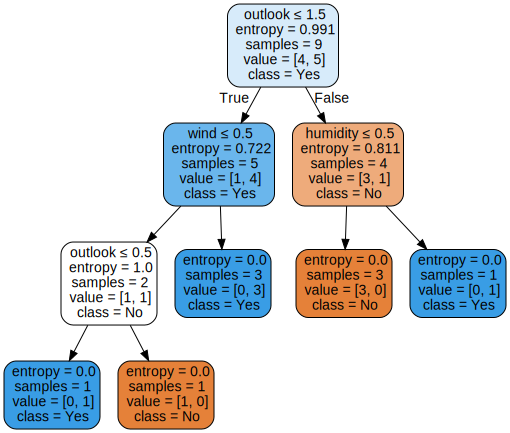

In [ ]:
# Vẽ cây quyết định bằng graphviz
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns,  
                           class_names=y.unique(),  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)
graph
#graph.render("travel_decision_tree")  # Lưu hình ảnh vào file travel_decision_tree.pdf